# 🚗 Car Price Prediction using Machine Learning

## 📌 Problem Statement
Predict the resale price of used cars using vehicle attributes such as age, mileage, fuel type, and engine specifications.

Accurate price estimation enables better decision-making for buyers, sellers, and dealerships.
### 🎯 Objectives
- Understand factors affecting car price
- Perform exploratory data analysis (EDA)
- Build and evaluate regression models for prediction
---
## 📦 Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 📂 Dataset

This project uses the **Toyota Corolla dataset**, containing vehicle specifications and pricing information.

**Target Variable:** ``` Price ```

In [80]:
df = pd.read_csv("ToyotaCorolla.csv")

df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


---
## 🔎 Data Overview

Let's understand the size, structure, and data types of the dataset.

In [81]:
print("df.shape =",df.shape)
print("df.columns =",df.columns)
print("df.info =",df.info)

df.shape = (1436, 37)
df.columns = Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')
df.info = <bound method DataFrame.info of         Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4      

---
## 📊 Statistical Summary

This shows the distribution and spread of numerical features.

In [82]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
## 🧼 Missing Values Check

We verify if any preprocessing is required.

In [83]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

✅ No missing values detected.

---

## 📈 Exploratory Data Analysis

Understanding how features relate to price.

---
### Price Distribution

C:\Users\Foram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


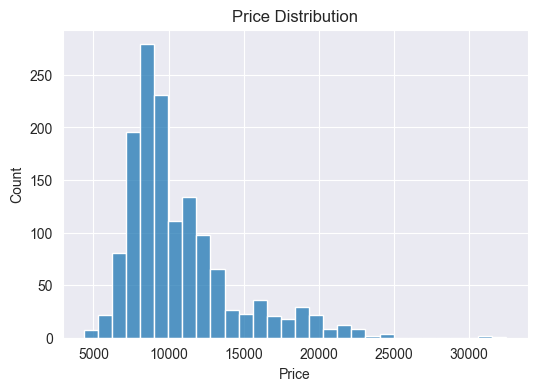

In [84]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Price"], bins=30)
plt.title('Price Distribution')
plt.show()

**Observation:**
The distribution is right-skewed, indicating most vehicles fall in lower price ranges while fewer high-priced cars exist.

---

### Age vs Price

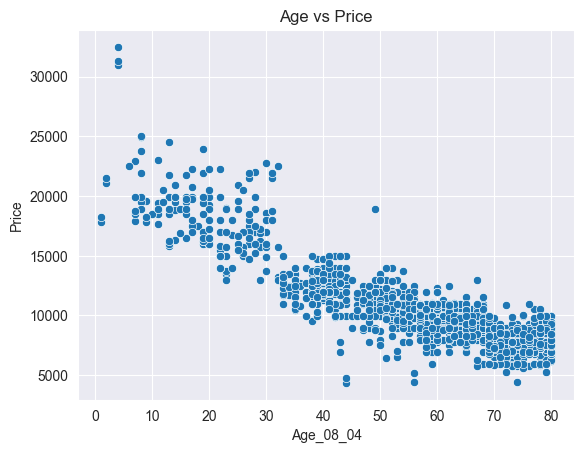

In [85]:
sns.scatterplot(x = df["Age_08_04"], y = df["Price"])
plt.title('Age vs Price')
plt.show()

**Insight:** Vehicle value declines with age.

---

### Mileage vs Price

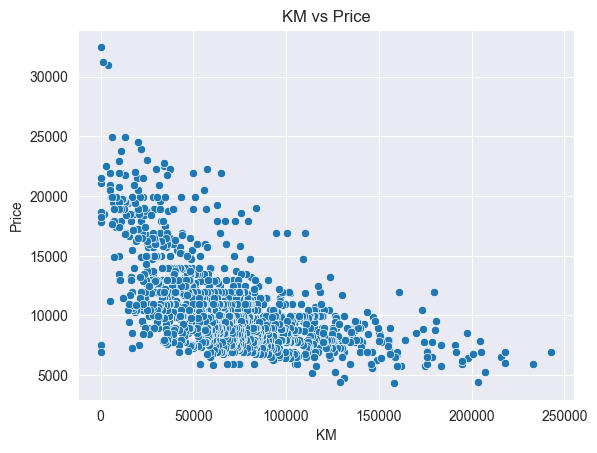

In [86]:
sns.scatterplot(x = df["KM"], y = df["Price"])
plt.title('KM vs Price')
plt.show()

**Insight:** Higher mileage reduces resale value.

---

### Horsepower vs Price

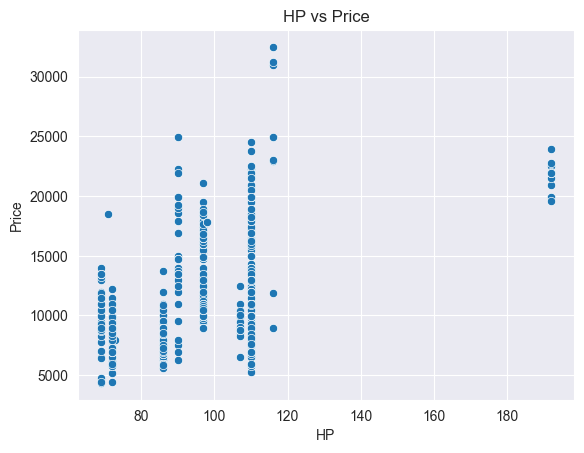

In [87]:
sns.scatterplot(x = df["HP"], y = df["Price"])
plt.title('HP vs Price')
plt.show()

**Insight:** Higher mileage reduces resale value.

---

### Fuel type Impact

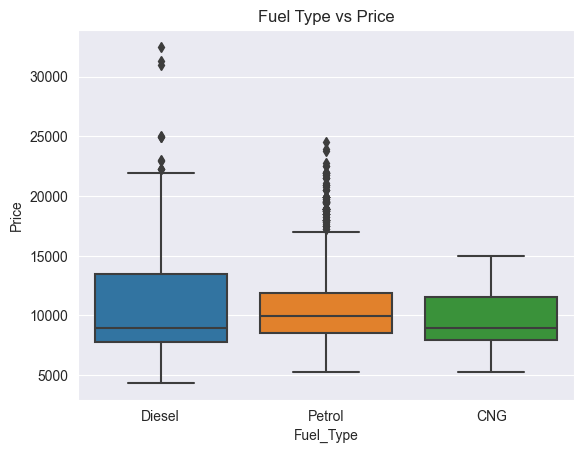

In [88]:
sns.boxplot(x = df["Fuel_Type"], y = df["Price"])
plt.title('Fuel Type vs Price')
plt.show()

### Automatic Transmission Impact

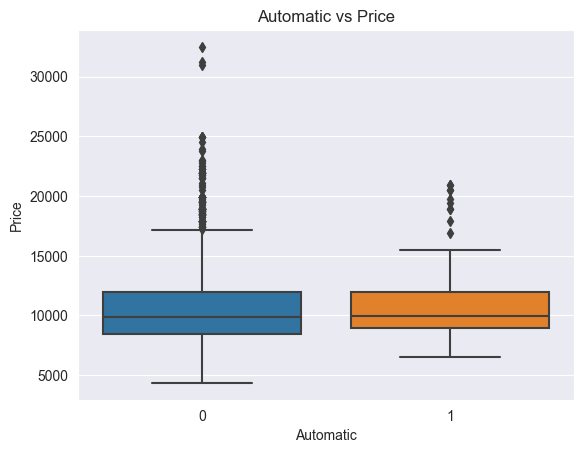

In [89]:
sns.boxplot(x = df["Automatic"], y = df["Price"])
plt.title('Automatic vs Price')
plt.show()

### Correlation Heatmap

C:\Users\Foram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


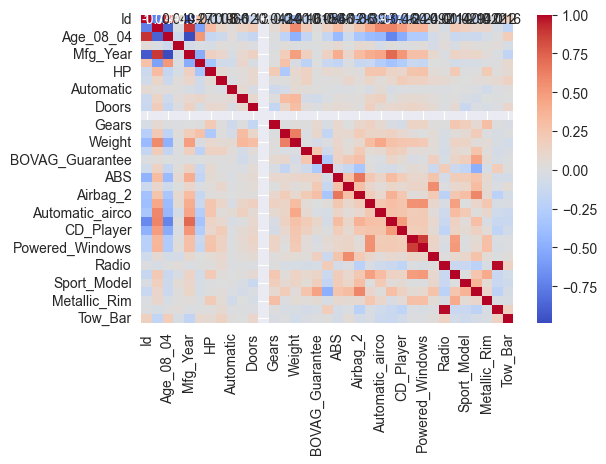

Price               1.000000
Mfg_Year            0.885159
Boardcomputer       0.601292
Automatic_airco     0.588262
Weight              0.581198
CD_Player           0.481374
Airco               0.429259
Powered_Windows     0.356518
Central_Lock        0.343458
HP                  0.314990
ABS                 0.306138
Airbag_2            0.248974
Mistlamps           0.222083
Quarterly_Tax       0.219197
Mfr_Guarantee       0.197802
Doors               0.185326
Sport_Model         0.164121
Guarantee_Period    0.146627
cc                  0.126389
Met_Color           0.108905
Metallic_Rim        0.108564
Backseat_Divider    0.102569
Airbag_1            0.093588
Power_Steering      0.064275
Gears               0.063104
Automatic           0.033081
BOVAG_Guarantee     0.028133
Mfg_Month          -0.018138
Radio              -0.041887
Radio_cassette     -0.043179
Tow_Bar            -0.172369
KM                 -0.569960
Id                 -0.738250
Age_08_04          -0.876590
Cylinders     

In [90]:
plt.figure(figsize=(6, 4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()
corr["Price"].sort_values(ascending = False)

**Observation:**
Price shows strong negative correlation with Age and KM, confirming depreciation trends.

---

### Outlier Check

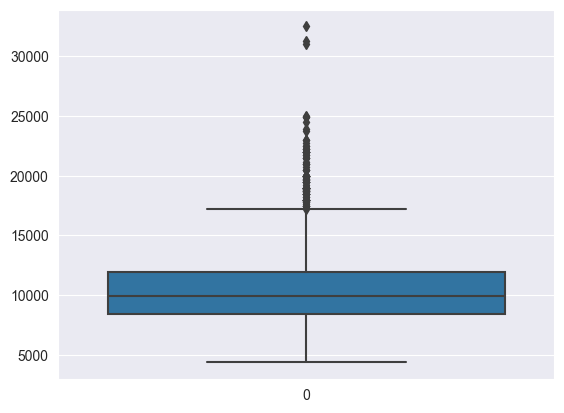

In [91]:
sns.boxplot(df["Price"])
plt.show()

---

## ⚙️ Data Preprocessing

### Steps performed:
- Removed irrelevant columns
- Encoded categorical variables
- Prepared features for modeling

In [92]:
df = df.drop(columns = ["Id", "Mfg_Year", "Mfg_Month", "Model", "Cylinders"])

---

### 🎯 Feature & Target Separation

In [93]:
y = df["Price"]
X = df.drop(columns = ["Price"])

---

### 🔄 Encode Categorical Variables

In [94]:
X = pd.get_dummies(X, columns=["Fuel_Type"], drop_first=True)

---

## 🧠 Model Training
### Train/Test Split

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [96]:
print(X_train.shape)
print(X_test.shape)

(1148, 32)
(288, 32)


### Models Evaluated
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regression

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import (r2_score, root_mean_squared_error)

---

### Linear Regression

In [98]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

### Ridge Regression
Ridge reduces coefficient instability when features correlate.

In [99]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

### Lasso Regression

In [100]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

---
## 📉 Model Evaluation

### Metrics Used

- R² Score -> explained variance
- Root Mean Squared Error (RMSE) -> prediction error magnitude

In [101]:
print("Linear R2:", r2_score(y_test, y_pred_lr))
print("Linear RMSE:", root_mean_squared_error(y_test, y_pred_lr))

print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", root_mean_squared_error(y_test, y_pred_ridge))

print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", root_mean_squared_error(y_test, y_pred_lasso))

Linear R2: 0.8822667145875321
Linear RMSE: 1253.3516534212706
Ridge R2: 0.8824031095087901
Ridge RMSE: 1252.6254342380787
Lasso R2: 0.8822469133712266
Lasso RMSE: 1253.4570477610491


### ✅ Model Selection
Ridge Regression chosen for better generalization and coefficient stability.

### 📊 Performance Insight

The model explains ~88% of price variation, indicating strong predictive capability.

---
## 🔍 Model Interpretation

Understanding feature influence.

In [102]:
coef = pd.Series(ridge.coef_, index=X.columns).sort_values()

coef_sorted.tail(10)   # strongest positive impact
coef_sorted.head(10)   # strongest negative impact

Radio_cassette     -394.668176
ABS                -374.810779
Backseat_Divider   -290.044087
Boardcomputer      -270.716258
Tow_Bar            -165.433087
Central_Lock       -162.724836
Age_08_04          -114.394838
Airbag_2            -35.516736
Mistlamps           -27.015708
Met_Color           -18.828397
dtype: float64

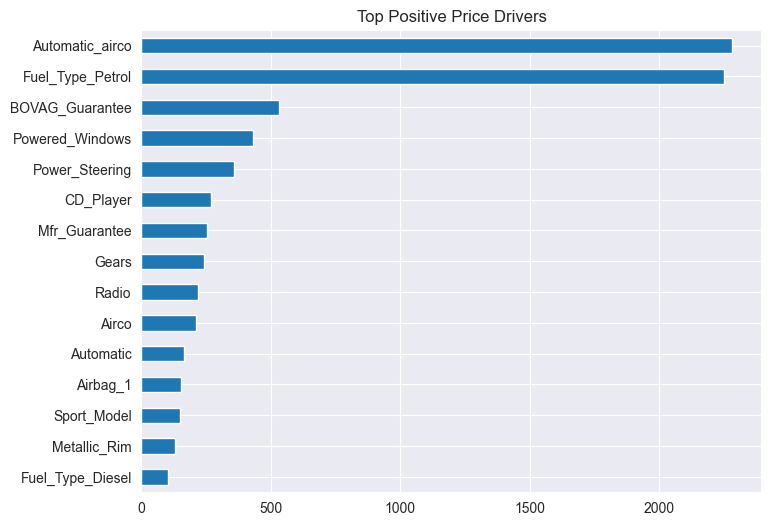

In [103]:
coef.tail(15).plot(kind="barh", figsize=(8,6))
plt.title("Top Positive Price Drivers")
plt.show()

---

## ✅ Final Summary
### Car Price Prediction Using Regression

- Built a regression model to predict used car prices.
- Conducted EDA to understand depreciation and feature impact.
- Engineered and encoded features for supervised learning.
- Compared Linear, Ridge, and Lasso models.
- Achieved R² ≈ 0.88, explaining most price variation.
- Identified key price drivers: vehicle age, mileage, fuel type, horsepower, premium features
---
